<a href="https://colab.research.google.com/github/S1R3S1D/NLP/blob/main/Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [3]:
#Creating the basic dataframe
path = '/content/SMSSpamCollection'
messages = pd.read_csv(path, sep='\t', names = ["label", "message"])


In [ ]:
#Getting a description of the messagees dataset
messages.groupby('label').describe().T

In [5]:
#Separating the ham and spam messages and creating a separate dataframe
ham_msgs = messages[messages.label == 'ham']
spam_msgs = messages[messages.label == 'spam']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


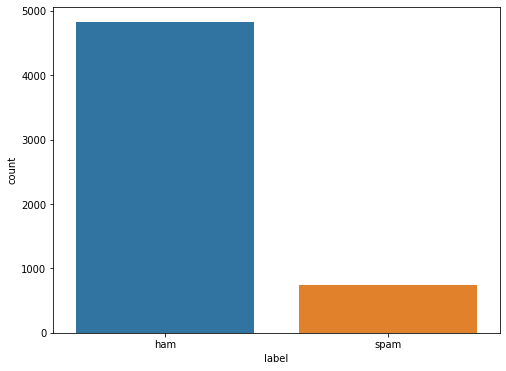

In [7]:
#Visualizing the number of spam and ham messages
plt.figure(figsize=(8, 6))
seaborn.countplot(messages.label)

In [8]:
#Fixing Imbalanced data by downsampling
ham_msg_df = ham_msgs.sample(n = len(spam_msgs))
spam_msg_df = spam_msgs

In [10]:
#Combined dataframe of the downsampled ham and spam data
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)

In [12]:
#Getting the average length of the messages
msg_df['text_length'] = msg_df['message'].apply(len)
labels = msg_df.groupby('label').mean()
labels

,text_length
label,
ham,70.385542
spam,138.670683


In [13]:
#Numeric labelling of Ham : 0 and Spam : 1
msg_df['msg_type']= msg_df['label'].map({'ham': 0, 'spam': 1})
msg_label = msg_df['msg_type'].values

In [15]:
#Splitting data into train and test datasets
train_msg, test_msg, train_labels, test_labels = train_test_split(msg_df['message'], msg_label, test_size=0.2)

In [16]:
# Defining pre-processing hyperparameters
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 500

In [18]:
#Tokenizing the words
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

In [19]:
#Creating a Word Index
word_index = tokenizer.word_index
tot_words = len(word_index)
print("Unique words : ", tot_words)

Unique words :  4172


In [20]:
#sequencing and padding
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )

testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,padding = padding_type, truncating = trunc_type)

### Dense Sequential Spam Detection Model

In [22]:
vocab_size = 500 
embeding_dim = 16
drop_value = 0.2 
n_dense = 24

In [23]:
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [ ]:
num_epochs = 30
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels), verbose=2)

In [27]:
model.evaluate(testing_padded, test_labels)

10/10 [==============================] - 0s 3ms/step - loss: 0.0823 - accuracy: 0.9732


[0.08231183141469955, 0.9732441306114197]

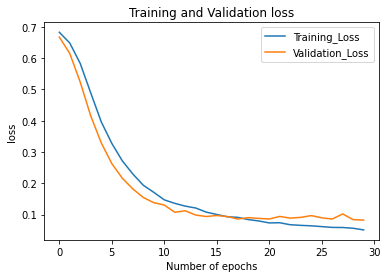

In [29]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

### LSTM Model

In [30]:
#LSTM hyperparameters
n_lstm = 20
drop_lstm =0.2


In [37]:
modellstm = Sequential()
modellstm.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
modellstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
modellstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
modellstm.add(Dense(1, activation='sigmoid'))

In [40]:
modellstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [41]:
num_epochs = 30
history = modellstm.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels), verbose=2)

Epoch 1/30
38/38 - 6s - loss: 0.6814 - accuracy: 0.5843 - val_loss: 0.6171 - val_accuracy: 0.6857
Epoch 2/30
38/38 - 1s - loss: 0.4629 - accuracy: 0.7947 - val_loss: 0.3630 - val_accuracy: 0.8821
Epoch 3/30
38/38 - 1s - loss: 0.2783 - accuracy: 0.9131 - val_loss: 0.2178 - val_accuracy: 0.9415
Epoch 4/30
38/38 - 1s - loss: 0.2294 - accuracy: 0.9289 - val_loss: 0.2587 - val_accuracy: 0.9223
Epoch 5/30
38/38 - 1s - loss: 0.1867 - accuracy: 0.9422 - val_loss: 0.2286 - val_accuracy: 0.9308
Epoch 6/30
38/38 - 1s - loss: 0.1505 - accuracy: 0.9531 - val_loss: 0.2433 - val_accuracy: 0.9304
Epoch 7/30
38/38 - 1s - loss: 0.1472 - accuracy: 0.9539 - val_loss: 0.2319 - val_accuracy: 0.9340
Epoch 8/30
38/38 - 1s - loss: 0.1357 - accuracy: 0.9568 - val_loss: 0.2868 - val_accuracy: 0.9227
Epoch 9/30
38/38 - 1s - loss: 0.1368 - accuracy: 0.9536 - val_loss: 0.1846 - val_accuracy: 0.9416
Epoch 10/30
38/38 - 1s - loss: 0.1322 - accuracy: 0.9554 - val_loss: 0.2005 - val_accuracy: 0.9427
Epoch 11/30
38/38 -

In [42]:
modellstm.evaluate(testing_padded, test_labels)

10/10 [==============================] - 0s 10ms/step - loss: 0.2338 - accuracy: 0.9359


[0.23381838202476501, 0.9359197020530701]

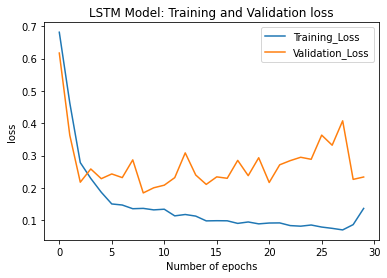

In [43]:

metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

### Bi-directional LSTM

In [44]:
modelbl = Sequential()
modelbl.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
modelbl.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
modelbl.add(Dense(1, activation='sigmoid'))

In [45]:
modelbl.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [47]:
num_epochs = 30
history = modelbl.fit(training_padded, train_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, test_labels), verbose=2)

Epoch 1/30
38/38 - 6s - loss: 0.6761 - accuracy: 0.6147 - val_loss: 0.6058 - val_accuracy: 0.6973
Epoch 2/30
38/38 - 1s - loss: 0.4340 - accuracy: 0.8550 - val_loss: 0.2570 - val_accuracy: 0.9445
Epoch 3/30
38/38 - 1s - loss: 0.2545 - accuracy: 0.9216 - val_loss: 0.1847 - val_accuracy: 0.9498
Epoch 4/30
38/38 - 1s - loss: 0.1860 - accuracy: 0.9422 - val_loss: 0.1575 - val_accuracy: 0.9620
Epoch 5/30
38/38 - 1s - loss: 0.1497 - accuracy: 0.9554 - val_loss: 0.1363 - val_accuracy: 0.9643
Epoch 6/30
38/38 - 1s - loss: 0.1425 - accuracy: 0.9578 - val_loss: 0.1376 - val_accuracy: 0.9680
Epoch 7/30
38/38 - 1s - loss: 0.1110 - accuracy: 0.9688 - val_loss: 0.1301 - val_accuracy: 0.9680
Epoch 8/30
38/38 - 1s - loss: 0.1003 - accuracy: 0.9738 - val_loss: 0.1903 - val_accuracy: 0.9535
Epoch 9/30
38/38 - 1s - loss: 0.0981 - accuracy: 0.9744 - val_loss: 0.1395 - val_accuracy: 0.9663
Epoch 10/30
38/38 - 1s - loss: 0.0822 - accuracy: 0.9797 - val_loss: 0.1299 - val_accuracy: 0.9677
Epoch 11/30
38/38 -

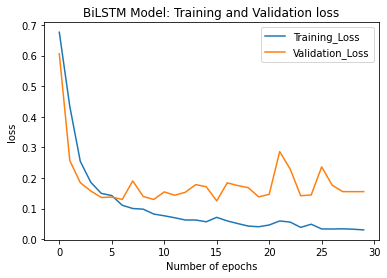

In [48]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

### Analysis of the three models

In [49]:
print(f"Dense architecture loss and accuracy: {model.evaluate(testing_padded, test_labels)} " )
print(f"LSTM architecture loss and accuracy: {modellstm.evaluate(testing_padded, test_labels)} " )
print(f"Bi-LSTM architecture loss and accuracy: {modelbl.evaluate(testing_padded, test_labels)} " )

10/10 [==============================] - 0s 3ms/step - loss: 0.0823 - accuracy: 0.9732
Dense architecture loss and accuracy: [0.08231183141469955, 0.9732441306114197] 
10/10 [==============================] - 0s 10ms/step - loss: 0.2338 - accuracy: 0.9359
LSTM architecture loss and accuracy: [0.23381838202476501, 0.9359197020530701] 
10/10 [==============================] - 0s 10ms/step - loss: 0.1555 - accuracy: 0.9637
Bi-LSTM architecture loss and accuracy: [0.1554940789937973, 0.9637458324432373] 


In [55]:
random_test=["Hey, I'm at the store, do you want something?",
            "Get free entry into the FA Cup final, offer stands only for 3 days, hurry up!!",
             "Buy 1 get 2 Free with Big Bonanza Offer @ R2D2 Mall today only or at 50% Discount, offer valid until stocks last"]
def predict_spam(predict_msg):
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model.predict(padded))
predict_spam(random_test)

array([[0.00258368],
       [0.3501888 ],
       [0.9961026 ]], dtype=float32)